In [1]:
import tensorflow as tf
import keras
import pandas as pd
import os
import numpy
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
datadir = r"C:\Users\lenovo\Downloads\Concrete Images\Concrete Crack Images"
classes = ["Negative","Positive"]

In [3]:
img_size= 120
data= []
for i in classes:
    path = os.path.join(datadir, i)
    class_label = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array,(img_size,img_size))
        data.append([new_img_array,class_label]) 
    

In [4]:
import random
random.shuffle(data)

In [17]:
len(data)

40000

In [5]:
# reshape the image to be on the correct format for tensorflow (nº images, width, height, channels)
from keras.utils import to_categorical
features=[]
labels=[]
for f,l in data:
    features.append(f)
    labels.append(l)
features = numpy.array(features).reshape(-1,img_size,img_size,1)
labels = to_categorical(labels)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [20]:
len(x_train)

30000

In [21]:
len(x_test)

10000

In [7]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/=255
x_test/=255 

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Conv2D, Dropout, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu',input_shape=(img_size,img_size,1)))  
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2))

model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2) , strides = 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              verbose=0, mode='auto')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)      

In [16]:
from keras.optimizers import SGD
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'],)

In [17]:
history= model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10, batch_size=32)

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1455s 49ms/step - loss: 0.0265 - accuracy: 0.9930 - val_loss: 0.0190 - val_accuracy: 0.9944
Epoch 2/10
30000/30000 [==============================] - 1391s 46ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0247 - val_accuracy: 0.9935
Epoch 3/10
30000/30000 [==============================] - 1403s 47ms/step - loss: 0.0170 - accuracy: 0.9958 - val_loss: 0.0158 - val_accuracy: 0.9959
Epoch 4/10
30000/30000 [==============================] - 1414s 47ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.0195 - val_accuracy: 0.9959
Epoch 5/10
30000/30000 [==============================] - 1399s 47ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.0130 - val_accuracy: 0.9966
Epoch 6/10
30000/30000 [==============================] - 1392s 46ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0120 - val_accuracy: 0.9970
Epoch 7/10
30000/30000 [==========================

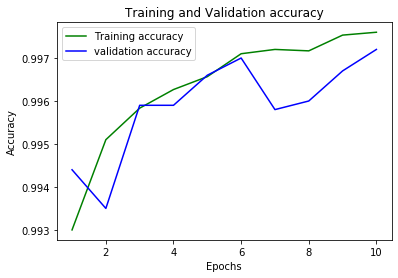

In [18]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
score = model.predict_classes(x_test)
score

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
score=numpy.array(score)

In [21]:
labels=numpy.array(labels)

In [22]:
from sklearn.metrics import confusion_matrix
scores_actual=[ numpy.argmax(item) for item in y_test]
print('Confusion Matrix')
print(confusion_matrix(scores_actual, score))

Confusion Matrix
[[4927   13]
 [  15 5045]]


In [23]:
len(score)

10000

In [24]:
from sklearn import metrics
acc= metrics.accuracy_score(scores_actual, score)
print("TEST ACCURACY: ", acc)

TEST ACCURACY:  0.9972
